In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
#impotring the data
df=pd.read_csv('EastWestAirlines.csv')

In [3]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
#Basic Analysis
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
df.shape

(3999, 12)

In [6]:
df.size

47988

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
df.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [9]:
df.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [10]:
df.duplicated().sum()

0

<Axes: >

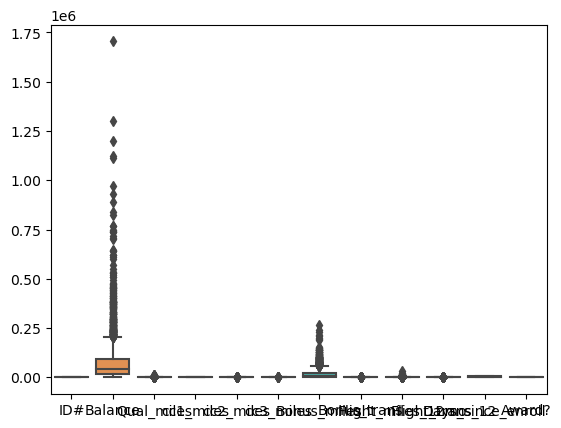

In [11]:
sns.boxplot(df)

<Axes: >

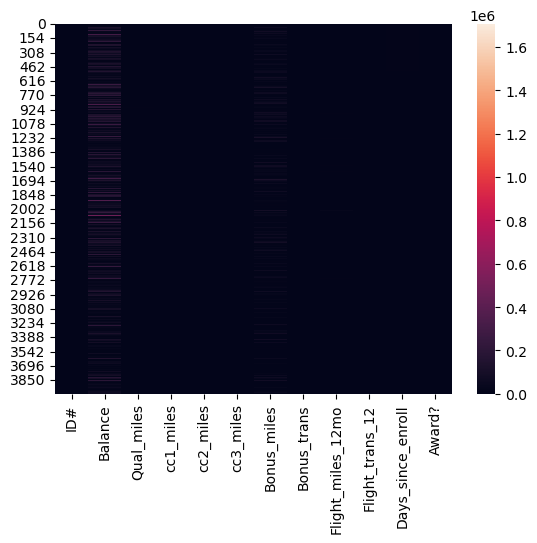

In [12]:
sns.heatmap(df)

In [13]:
std_scaler=StandardScaler()

In [14]:
df['Balance']=std_scaler.fit_transform(df[['Balance']])
df['Bonus_miles']=std_scaler.fit_transform(df[['Bonus_miles']])
df['Flight_miles_12mo']=std_scaler.fit_transform(df[['Flight_miles_12mo']])
df['Days_since_enroll']=std_scaler.fit_transform(df[['Days_since_enroll']])

In [15]:
features=df.drop('ID#',axis=1)

In [16]:
kmeans=KMeans(n_clusters=3)

In [17]:
kmeans

KMeans(n_clusters=3)

In [18]:
cluster=kmeans.fit(features)

In [19]:
cluster

KMeans(n_clusters=3)

In [20]:
np.unique(cluster.labels_)

array([0, 1, 2])

In [21]:
cluster.labels_.shape

(3999,)

In [22]:
df['cluster']=cluster.labels_
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,-0.451141,0,1,1,1,-0.702786,1,-0.328603,0,1.395454,0,1
1,2,-0.539457,0,1,1,1,-0.701088,2,-0.328603,0,1.379957,0,1
2,3,-0.320031,0,1,1,1,-0.539253,4,-0.328603,0,1.411920,0,1
3,4,-0.583799,0,1,1,1,-0.689286,1,-0.328603,0,1.372208,0,1
4,5,0.239678,0,4,1,1,1.083121,26,1.154932,4,1.363975,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,-0.547079,0,1,1,1,-0.356960,4,-0.185750,1,-1.315120,1,1
3995,4018,-0.091465,0,1,1,1,-0.669367,5,-0.328603,0,-1.318994,1,1
3996,4019,-0.000043,0,3,1,1,0.343804,8,-0.328603,0,-1.315604,1,1
3997,4020,-0.185607,0,1,1,1,-0.689286,1,0.028531,1,-1.316088,0,1


In [23]:
df[df.cluster==0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
21,22,1.112309,2024,1,1,1,-0.159220,16,0.957080,9,1.345088,1,0
135,138,1.844750,1776,1,1,1,0.083947,26,4.794129,23,1.261306,1,0
177,180,-0.451706,1745,2,1,1,-0.404873,12,-0.328603,0,1.661330,1,0
193,197,-0.207053,2398,1,1,1,-0.709992,0,-0.328603,0,1.636631,0,0
207,211,-0.500355,1250,1,1,1,-0.557018,12,0.492805,3,1.621618,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3819,3842,-0.522318,1490,4,1,1,1.092522,34,-0.328603,0,-1.173707,1,0
3832,3855,-0.093986,1452,1,1,1,-0.392118,15,2.971316,11,-1.180487,1,0
3846,3869,0.237276,1678,5,1,1,2.255436,51,5.135549,26,-1.188236,1,0
3897,3920,1.054262,2954,3,1,1,0.044441,20,1.457068,5,-1.234727,1,0


In [24]:
df[df.cluster==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,1,-0.451141,0,1,1,1,-0.702786,1,-0.328603,0,1.395454,0,1
1,2,-0.539457,0,1,1,1,-0.701088,2,-0.328603,0,1.379957,0,1
2,3,-0.320031,0,1,1,1,-0.539253,4,-0.328603,0,1.411920,0,1
3,4,-0.583799,0,1,1,1,-0.689286,1,-0.328603,0,1.372208,0,1
4,5,0.239678,0,4,1,1,1.083121,26,1.154932,4,1.363975,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,-0.547079,0,1,1,1,-0.356960,4,-0.185750,1,-1.315120,1,1
3995,4018,-0.091465,0,1,1,1,-0.669367,5,-0.328603,0,-1.318994,1,1
3996,4019,-0.000043,0,3,1,1,0.343804,8,-0.328603,0,-1.315604,1,1
3997,4020,-0.185607,0,1,1,1,-0.689286,1,0.028531,1,-1.316088,0,1


In [25]:
df[df.cluster==2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
70,72,0.107258,5031,2,1,1,-0.070766,16,0.492805,4,1.766421,0,2
335,340,2.033043,6727,4,1,1,1.663419,27,0.385665,2,1.444368,1,2
420,426,4.528293,7210,1,1,1,0.278332,26,5.200548,15,2.023095,1,2
589,596,0.593905,8264,1,1,1,-0.570228,13,-0.328603,0,1.149435,1,2
681,691,0.451363,5051,1,1,1,-0.534822,17,2.242763,14,1.075823,1,2
800,810,0.013127,6286,4,1,1,1.760197,13,-0.328603,0,0.979449,0,2
833,843,0.410177,8559,1,1,1,-0.579546,13,0.849939,12,0.955719,1,2
896,907,1.440624,8753,1,1,1,-0.227549,6,0.492805,3,0.899057,0,2
901,912,0.977627,9325,5,1,1,0.175466,23,0.349952,3,0.884044,1,2
1177,1189,-0.410739,11148,3,1,1,-0.183363,10,-0.328603,0,0.705825,1,2


In [26]:
cluster.cluster_centers_

array([[ 7.44790106e-01,  2.37216071e+03,  2.17857143e+00,
         1.00000000e+00,  1.00000000e+00,  2.80672408e-01,
         1.53482143e+01,  8.31355741e-01,  5.06250000e+00,
         1.23184256e-01,  6.87500000e-01],
       [-2.56548086e-02,  1.64292024e+01,  2.05611847e+00,
         1.01506885e+00,  1.01273058e+00, -8.73211170e-03,
         1.14827228e+01, -2.84992198e-02,  1.24915562e+00,
        -3.66547035e-03,  3.59833723e-01],
       [ 4.03391222e-01,  6.51042105e+03,  2.05263158e+00,
         1.00000000e+00,  1.00000000e+00,  5.72260065e-02,
         1.26315789e+01,  4.36359318e-01,  3.10526316e+00,
         8.20417669e-03,  5.00000000e-01]])

In [27]:
cluster.inertia_

234596863.17853147

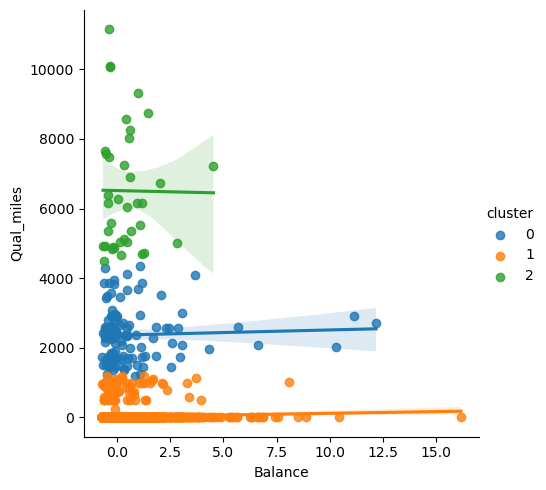

In [28]:
sns.lmplot(data=df,x='Balance',y='Qual_miles',hue='cluster')

# Elbow Method

In [29]:
inertia=[]
no_clusters=range(10)

In [30]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    print(inertia)

[2393476637.539386]
[2393476637.539386, 642778071.7395535]
[2393476637.539386, 642778071.7395535, 234596863.17853147]
[2393476637.539386, 642778071.7395535, 234596863.17853147, 129793149.50688115]
[2393476637.539386, 642778071.7395535, 234596863.17853147, 129793149.50688115, 72020603.3712653]
[2393476637.539386, 642778071.7395535, 234596863.17853147, 129793149.50688115, 72020603.3712653, 48007149.645978734]
[2393476637.539386, 642778071.7395535, 234596863.17853147, 129793149.50688115, 72020603.3712653, 48007149.645978734, 34744877.3358016]
[2393476637.539386, 642778071.7395535, 234596863.17853147, 129793149.50688115, 72020603.3712653, 48007149.645978734, 34744877.3358016, 24162285.121205814]
[2393476637.539386, 642778071.7395535, 234596863.17853147, 129793149.50688115, 72020603.3712653, 48007149.645978734, 34744877.3358016, 24162285.121205814, 16829370.36793124]
[2393476637.539386, 642778071.7395535, 234596863.17853147, 129793149.50688115, 72020603.3712653, 48007149.645978734, 34744877

Text(0.5, 1.0, 'Scree plot/Elbow graph')

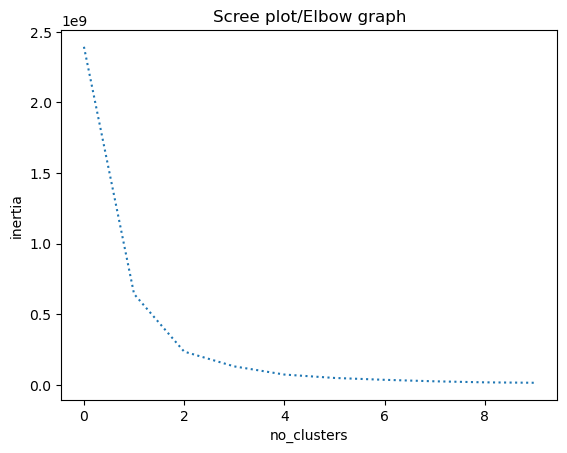

In [31]:
plt.plot(no_clusters,inertia,linestyle=':')
plt.xlabel('no_clusters')
plt.ylabel('inertia')
plt.title('Scree plot/Elbow graph')

In [32]:
silhouette_score(features,cluster.labels_)

0.9618996157994693

# Hierarchial clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [34]:
features

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451141,0,1,1,1,-0.702786,1,-0.328603,0,1.395454,0
1,-0.539457,0,1,1,1,-0.701088,2,-0.328603,0,1.379957,0
2,-0.320031,0,1,1,1,-0.539253,4,-0.328603,0,1.411920,0
3,-0.583799,0,1,1,1,-0.689286,1,-0.328603,0,1.372208,0
4,0.239678,0,4,1,1,1.083121,26,1.154932,4,1.363975,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,0,1,1,1,-0.356960,4,-0.185750,1,-1.315120,1
3995,-0.091465,0,1,1,1,-0.669367,5,-0.328603,0,-1.318994,1
3996,-0.000043,0,3,1,1,0.343804,8,-0.328603,0,-1.315604,1
3997,-0.185607,0,1,1,1,-0.689286,1,0.028531,1,-1.316088,0


In [35]:
agg=AgglomerativeClustering(n_clusters=2,linkage='complete')

In [36]:
cluster=agg.fit(features)
cluster

AgglomerativeClustering(linkage='complete')

In [37]:
cluster.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
silhouette_score(features,cluster.labels_)

0.9633082486592279

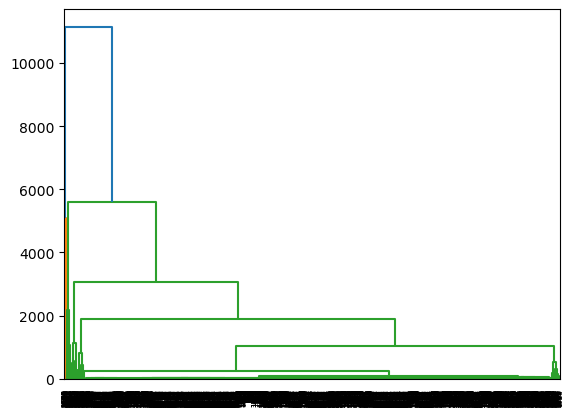

In [39]:
dendrogram=sch.dendrogram(sch.linkage(features,method='complete'))

# DB SCAN

In [40]:
from sklearn.cluster import DBSCAN

In [41]:
labels=DBSCAN(eps=0.4,min_samples=4).fit(features).labels_

In [42]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79], dtype=int64)

In [43]:
silhouette_score(features,labels)

-0.4795383976692293

In [44]:
eps=[0.1,0.2,0.3,0.4,0.5,0.6]
min_nodes= range(1,11)

In [45]:
output=[]
for ep in eps:
    for mn in min_nodes:
        labels=DBSCAN(eps=ep,min_samples=mn).fit(features).labels_
        score=silhouette_score(features,labels)
        output.append([ep,mn,score])                                        
                                            

In [46]:
output

[[0.1, 1, 0.021733920360884236],
 [0.1, 2, -0.6686787865167845],
 [0.1, 3, -0.7109702209881081],
 [0.1, 4, -0.7334265352964879],
 [0.1, 5, -0.7546343432272455],
 [0.1, 6, -0.7656162965716856],
 [0.1, 7, -0.7728492789004842],
 [0.1, 8, -0.77599125449025],
 [0.1, 9, -0.7867607108745935],
 [0.1, 10, -0.7939800666923633],
 [0.2, 1, 0.029682308679734006],
 [0.2, 2, -0.540466764521653],
 [0.2, 3, -0.6142541288032232],
 [0.2, 4, -0.6531602784301422],
 [0.2, 5, -0.6809577379032044],
 [0.2, 6, -0.6967098242585613],
 [0.2, 7, -0.7087425475127126],
 [0.2, 8, -0.733660021687958],
 [0.2, 9, -0.7308423842330176],
 [0.2, 10, -0.7329841202085209],
 [0.3, 1, 0.06513461388101792],
 [0.3, 2, -0.3965941006720163],
 [0.3, 3, -0.5061113195566836],
 [0.3, 4, -0.5707251423006011],
 [0.3, 5, -0.6030812409489851],
 [0.3, 6, -0.6276408437622706],
 [0.3, 7, -0.6226813154137806],
 [0.3, 8, -0.6513926807750898],
 [0.3, 9, -0.6687703780525488],
 [0.3, 10, -0.6811243051024654],
 [0.4, 1, 0.08820646674860005],
 [0.4, 

In [47]:
a=pd.DataFrame(output)

In [48]:
a.iloc[:,2].max()

0.10573152818213229

In [49]:
a[a[2]== 0.10573152818213229]

,0,1,2
40,0.5,1,0.105732


In [50]:
labels=DBSCAN(eps=0.5,min_samples=1).fit(features).labels_

In [51]:
np.unique(labels)

array([   0,    1,    2, ..., 2113, 2114, 2115], dtype=int64)

<Axes: xlabel='Balance', ylabel='Qual_miles'>

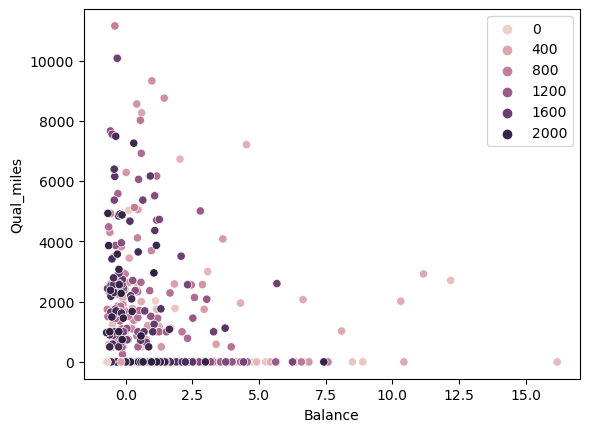

In [52]:
sns.scatterplot(data=df,x='Balance',y='Qual_miles',hue=labels)